In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = {10,15}

In [3]:
!pip -qq install apyori
import apyori

In [6]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv'
mercado = pd.read_csv(url, header=None)
mercado.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(mercado)

7501

In [8]:
for index in mercado.columns:
  mercado[index] = mercado[index].str.strip()

In [10]:
itens = mercado.melt()['value'].dropna().sort_values()

In [12]:
print(f'Existem {itens.nunique()} produtos distintos:\n', itens.unique())

Existem 119 produtos distintos:
 ['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffins'

<function matplotlib.pyplot.show>

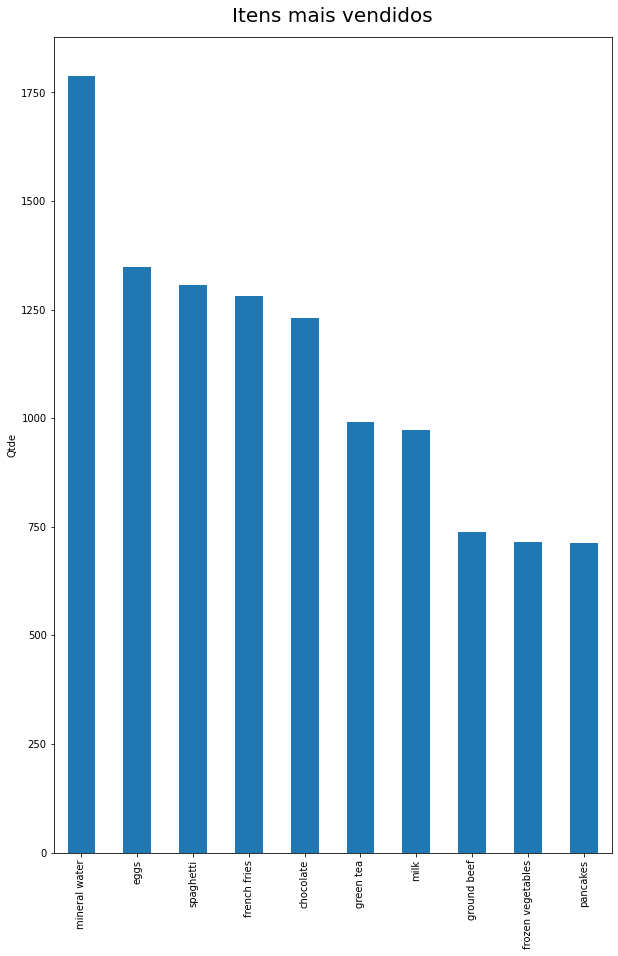

In [19]:
qtde_itens = itens.value_counts()
barra = qtde_itens.nlargest(10).plot(kind='bar')
barra.set_title('Itens mais vendidos', size=20, weight=500, pad=15)
barra.set_ylabel('Qtde')
plt.show

<function matplotlib.pyplot.show>

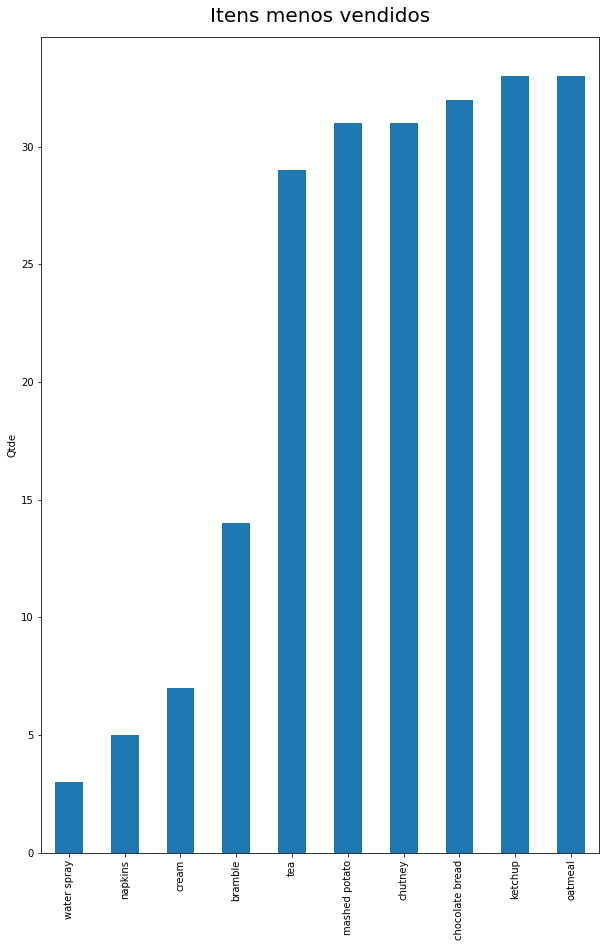

In [21]:
qtde_itens = itens.value_counts()
barra = qtde_itens.nsmallest(10).plot(kind='bar')
barra.set_title('Itens menos vendidos', size=20, weight=500, pad=15)
barra.set_ylabel('Qtde')
plt.show

In [22]:
qtde_por_cesta = mercado.notna().apply(sum, axis=1)

In [24]:
cestas = [set(linha.dropna()) for _, linha in mercado[qtde_por_cesta > 1].iterrows()]
cestas[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [25]:
len(cestas)

5747

In [33]:
minsup = 0.04
minconf = 0.3

regras_associacao = apyori.apriori(cestas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
  itens = list(regra.items)
  print(
      f'{itens[:-1]} --> [{itens[-1]}] Suporte: {regra.support:.3f}'
      f'Confiança: {regra.ordered_statistics[0].confidence:.3f}'
  )

['mineral water'] --> [chocolate] Suporte: 0.069Confiança: 0.342
['eggs'] --> [mineral water] Suporte: 0.066Confiança: 0.304
['frozen vegetables'] --> [mineral water] Suporte: 0.047Confiança: 0.385
['ground beef'] --> [mineral water] Suporte: 0.053Confiança: 0.429
['spaghetti'] --> [ground beef] Suporte: 0.051Confiança: 0.411
['milk'] --> [mineral water] Suporte: 0.063Confiança: 0.383
['pancakes'] --> [mineral water] Suporte: 0.044Confiança: 0.375
['spaghetti'] --> [mineral water] Suporte: 0.078Confiança: 0.357
